<a href="https://colab.research.google.com/github/mastersigat/Script_Python_M2SIGAT/blob/main/Base_SITADEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet sur la base Sitadel

Pablo - Orlane - Carl

## Préparation des données

### Importation des librairies

In [ ]:
#Initialisation de l'environnement avec geopandas
!apt update
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!git clone https://github.com/geopandas/geopandas.git
!pip install geopandas
# Instal contextily (fonds de carte)
!pip install contextily
# Install mapclassify (cartographie thématique)
!pip install mapclassify
#Depuis sa version 0.8, Geopandas peut fonctionner de manière expérimental avec Pygeos ce qui accèlère certaines opérations
!pip install pygeos
# Pour la cartographie interactive
!pip install folium
!pip install matplotlib_scalebar


In [ ]:
#Importation des librairies nécessaires
from shapely.geometry import LineString, Point, Polygon
from matplotlib import pyplot as plt
import geopandas as gpd
import pandas as pd
import contextily as ctx
import numpy as np
from pprint import pprint
import pygeos
from osgeo import gdal
import rasterio
from rasterio.plot import show,show_hist

### Importation des données

In [ ]:
#Téléchargement des datas depuis le site cadastre.data.gouv et 
!wget https://cadastre.data.gouv.fr/bundler/cadastre-etalab/departements/33/shp/communes -O communes.zip
!wget https://www.statistiques.developpement-durable.gouv.fr/sites/default/files/2022-03/PC_DP_cr%C3%A9ant_logements_2017_2022.zip -O sitadel.zip


,id,nom,created,updated,geometry
0,33007,ARBANATS,2008-03-27,2020-11-26,"POLYGON ((428210.132 6400195.105, 428183.096 6..."
1,33010,ARCINS,2008-07-03,2020-09-22,"POLYGON ((406597.258 6447341.096, 406596.103 6..."
2,33009,ARCACHON,2007-01-26,2021-12-06,"POLYGON ((366681.798 6402162.607, 366683.258 6..."
3,33016,ASQUES,2007-11-06,2021-02-26,"POLYGON ((428761.988 6432098.743, 428708.987 6..."
4,33014,LES ARTIGUES DE LUSSAC,2010-06-30,2022-03-17,"POLYGON ((451712.490 6433106.975, 451691.133 6..."


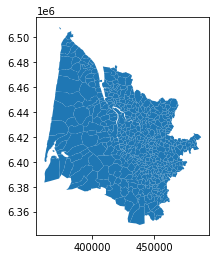

In [ ]:
#Chargement de la couche des communes
#Choix du DEP de la Gironde
communes = gpd.read_file("communes.zip", encoding='utf-8')
communes.plot()
communes.head()

In [ ]:
#Réorganiser la table

communesok = communes[["id", "nom", "geometry"]]
communesok.head()

,id,nom,geometry
0,33007,ARBANATS,"POLYGON ((428210.132 6400195.105, 428183.096 6..."
1,33010,ARCINS,"POLYGON ((406597.258 6447341.096, 406596.103 6..."
2,33009,ARCACHON,"POLYGON ((366681.798 6402162.607, 366683.258 6..."
3,33016,ASQUES,"POLYGON ((428761.988 6432098.743, 428708.987 6..."
4,33014,LES ARTIGUES DE LUSSAC,"POLYGON ((451712.490 6433106.975, 451691.133 6..."


In [ ]:
len(communes)

535

In [ ]:
#Chargement de la couche sitadel
sitadel= gpd.read_file("sitadel.zip", encoding='utf-8')
sitadel.head()

,REG,DEP,COMM,Type_DAU,Num_DAU,Etat_DAU,DATE_REELLE_AUTORISATION,DATE_REELLE_DOC,DATE_REELLE_DAACT,DPC_AUT,...,SURF_HAB_CREEE,SURF_HAB_ISSUE_TRANSFO,SURF_HAB_DEMOLIE,SURF_HAB_TRANSFORMEE,SURF_LOC_AVANT,SURF_LOC_CREEE,SURF_LOC_ISSUE_TRANSFO,SURF_LOC_DEMOLIE,SURF_LOC_TRANSFORMEE,geometry
0,82,01,01001,PC,00100116V0008,2,2017-02-17,,,201702,...,106,0,0,0,0,0,0,0,0,None
1,82,01,01001,PC,00100117V0004,2,2017-08-30,,,201811,...,104,0,0,0,0,0,0,0,0,None
2,82,01,01001,PC,00100117V0005,6,2017-08-08,2017-08-11,2019-01-01,201811,...,0,114,0,0,215,0,0,0,114,None
3,82,01,01001,PC,00100117V0006,2,2017-09-08,,,201905,...,162,0,0,0,0,0,0,0,0,None
4,82,01,01001,PC,00100117V0007,2,2017-09-08,,,201811,...,126,0,0,0,0,0,0,0,0,None


In [ ]:
len(sitadel)

802669

In [ ]:
#Ne garder que les Permis de Construire (PC)
sitadelPC = sitadel[(sitadel["Type_DAU"] == 'PC')]
sitadelPC.head()


,REG,DEP,COMM,Type_DAU,Num_DAU,Etat_DAU,DATE_REELLE_AUTORISATION,DATE_REELLE_DOC,DATE_REELLE_DAACT,DPC_AUT,...,SURF_HAB_CREEE,SURF_HAB_ISSUE_TRANSFO,SURF_HAB_DEMOLIE,SURF_HAB_TRANSFORMEE,SURF_LOC_AVANT,SURF_LOC_CREEE,SURF_LOC_ISSUE_TRANSFO,SURF_LOC_DEMOLIE,SURF_LOC_TRANSFORMEE,geometry
0,82,01,01001,PC,00100116V0008,2,2017-02-17,,,201702,...,106,0,0,0,0,0,0,0,0,None
1,82,01,01001,PC,00100117V0004,2,2017-08-30,,,201811,...,104,0,0,0,0,0,0,0,0,None
2,82,01,01001,PC,00100117V0005,6,2017-08-08,2017-08-11,2019-01-01,201811,...,0,114,0,0,215,0,0,0,114,None
3,82,01,01001,PC,00100117V0006,2,2017-09-08,,,201905,...,162,0,0,0,0,0,0,0,0,None
4,82,01,01001,PC,00100117V0007,2,2017-09-08,,,201811,...,126,0,0,0,0,0,0,0,0,None


In [ ]:
len(sitadelPC)

783895

In [ ]:
#Réorganiser la table

sitadelok = sitadelPC[["DEP", "COMM", "Num_DAU", "Etat_DAU", "DATE_REELLE_AUTORISATION", "DATE_REELLE_DAACT", "CAT_DEM","CODPOST_DEM", "SUPERFICIE_TERRAIN", "ZONE_OP", "NATURE_PROJET", "UTILISATION", "RES_PRINCIP_OU_SECOND","TYP_ANNEXE", "RESIDENCE_SERVICE", "NB_LGT_PRET_LOC_SOCIAL", "SURF_HAB_AVANT", "SURF_HAB_CREEE", "SURF_HAB_ISSUE_TRANSFO", "NB_LGT_TOT_CREES"]]
sitadelok.head()

,DEP,COMM,Num_DAU,Etat_DAU,DATE_REELLE_AUTORISATION,DATE_REELLE_DAACT,CAT_DEM,CODPOST_DEM,SUPERFICIE_TERRAIN,ZONE_OP,NATURE_PROJET,UTILISATION,RES_PRINCIP_OU_SECOND,TYP_ANNEXE,RESIDENCE_SERVICE,NB_LGT_PRET_LOC_SOCIAL,SURF_HAB_AVANT,SURF_HAB_CREEE,SURF_HAB_ISSUE_TRANSFO,NB_LGT_TOT_CREES
0,01,01001,00100116V0008,2,2017-02-17,,10,01000,0,4,1,5,1,7,9,0,0,106,0,1
1,01,01001,00100117V0004,2,2017-08-30,,10,69001,0,4,1,5,1,7,9,0,0,104,0,1
2,01,01001,00100117V0005,6,2017-08-08,2019-01-01,10,01400,0,4,2,5,1,7,9,0,0,0,114,1
3,01,01001,00100117V0006,2,2017-09-08,,10,01400,0,4,1,1,1,6,9,0,0,162,0,1
4,01,01001,00100117V0007,2,2017-09-08,,10,01400,0,4,1,5,1,7,9,0,0,126,0,1


In [ ]:
#Renommer les colonnes
sitadelok = sitadelok.rename(columns={'DATE_REELLE_AUTORISATION': 'DATE_AUTORISATION', 'DATE_REELLE_DAACT':'DATE_DAACT', 'SUPERFICIE_TERRAIN':'SUP_TERRAIN', 'RES_PRINCIP_OU_SECOND': 'TYPE_RES','NB_LGT_PRET_LOC_SOCIAL': 'NB_LGT_SOC','SURF_HAB_ISSUE_TRANSFO': 'SURF_HAB_TRANSFO', 'NB_LGT_TOT_CREES': 'NB_LGT'})
sitadelok.head()

,DEP,COMM,Num_DAU,Etat_DAU,DATE_AUTORISATION,DATE_DAACT,CAT_DEM,CODPOST_DEM,SUP_TERRAIN,ZONE_OP,NATURE_PROJET,UTILISATION,TYPE_RES,TYP_ANNEXE,RESIDENCE_SERVICE,NB_LGT_SOC,SURF_HAB_AVANT,SURF_HAB_CREEE,SURF_HAB_TRANSFO,NB_LGT
0,01,01001,00100116V0008,2,2017-02-17,,10,01000,0,4,1,5,1,7,9,0,0,106,0,1
1,01,01001,00100117V0004,2,2017-08-30,,10,69001,0,4,1,5,1,7,9,0,0,104,0,1
2,01,01001,00100117V0005,6,2017-08-08,2019-01-01,10,01400,0,4,2,5,1,7,9,0,0,0,114,1
3,01,01001,00100117V0006,2,2017-09-08,,10,01400,0,4,1,1,1,6,9,0,0,162,0,1
4,01,01001,00100117V0007,2,2017-09-08,,10,01400,0,4,1,5,1,7,9,0,0,126,0,1


In [ ]:
#Filtrer par DEP (ici Gironde)
sitadelok = sitadelok[(sitadelok["DEP"] == '33')]
sitadelok.head()


,DEP,COMM,Num_DAU,Etat_DAU,DATE_AUTORISATION,DATE_DAACT,CAT_DEM,CODPOST_DEM,SUP_TERRAIN,ZONE_OP,NATURE_PROJET,UTILISATION,TYPE_RES,TYP_ANNEXE,RESIDENCE_SERVICE,NB_LGT_SOC,SURF_HAB_AVANT,SURF_HAB_CREEE,SURF_HAB_TRANSFO,NB_LGT
231293,33,33001,03300116F0022,6,2017-01-30,2018-06-07,10,33500,1900,4,1,1,1,2,9,0,0,98,0,1
231294,33,33001,03300116F0026,5,2017-02-09,,10,33500,1151,4,1,1,1,2,9,0,0,132,0,1
231295,33,33001,03300117F0001,5,2017-01-30,,10,33500,1078,4,1,1,1,4,9,0,0,104,0,1
231296,33,33001,03300117F0002,5,2017-03-23,,10,33570,1816,4,2,5,3,6,9,0,0,87,0,1
231297,33,33001,03300117F0006,6,2017-05-05,2018-04-20,10,33910,2000,4,1,5,1,7,9,0,0,115,0,1


In [ ]:
len(sitadelok)

30585

## Jointure

In [ ]:
#Jointure par attribut
communesPC = communes.merge(sitadelok, left_on='id', right_on='COMM')
communesPC.head()

,id,nom,created,updated,geometry,DEP,COMM,Num_DAU,Etat_DAU,DATE_AUTORISATION,...,NATURE_PROJET,UTILISATION,TYPE_RES,TYP_ANNEXE,RESIDENCE_SERVICE,NB_LGT_SOC,SURF_HAB_AVANT,SURF_HAB_CREEE,SURF_HAB_TRANSFO,NB_LGT
0,33007,ARBANATS,2008-03-27,2020-11-26,"POLYGON ((428210.132 6400195.105, 428183.096 6...",33,33007,03300717P0001,6,2017-05-11,...,1,5,1,7,9,0,0,99,0,1
1,33007,ARBANATS,2008-03-27,2020-11-26,"POLYGON ((428210.132 6400195.105, 428183.096 6...",33,33007,03300717P0004,6,2017-07-12,...,1,5,1,7,9,0,0,113,0,1
2,33007,ARBANATS,2008-03-27,2020-11-26,"POLYGON ((428210.132 6400195.105, 428183.096 6...",33,33007,03300717P0007,2,2017-08-25,...,1,5,1,7,9,0,0,111,0,1
3,33007,ARBANATS,2008-03-27,2020-11-26,"POLYGON ((428210.132 6400195.105, 428183.096 6...",33,33007,03300717P0008,5,2017-07-25,...,1,5,1,7,9,0,0,106,0,1
4,33007,ARBANATS,2008-03-27,2020-11-26,"POLYGON ((428210.132 6400195.105, 428183.096 6...",33,33007,03300717P0011,6,2017-09-27,...,1,5,1,7,9,0,0,87,0,1


In [ ]:
len(communesPC)

30569

## Analyse spatiale & Graphique

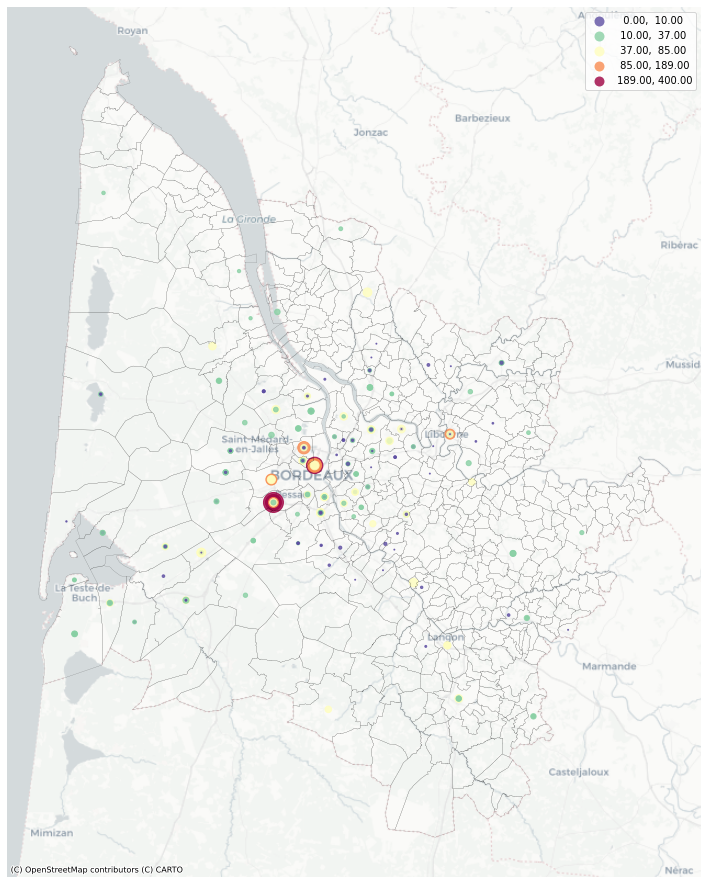

In [ ]:
#Cartographier le nombre de surface créé par PC

communesPC["NB_LGT_SOC"] = communesPC["NB_LGT_SOC"].astype(int)
communesPC.geometry = communesPC['geometry'].centroid
communes

Carte1, ax = plt.subplots(figsize=(18,16))
communes.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.1, color = 'black')
communesPC.to_crs('EPSG:3857').plot(ax=ax, markersize="NB_LGT_SOC", column="NB_LGT_SOC", alpha=0.8, cmap='Spectral_r',scheme='natural_breaks', categorical=False, legend=True)
ctx.add_basemap(ax,  source=ctx.providers.CartoDB.Positron)
ax.axis("off")
plt.show()

TypeError: ignored

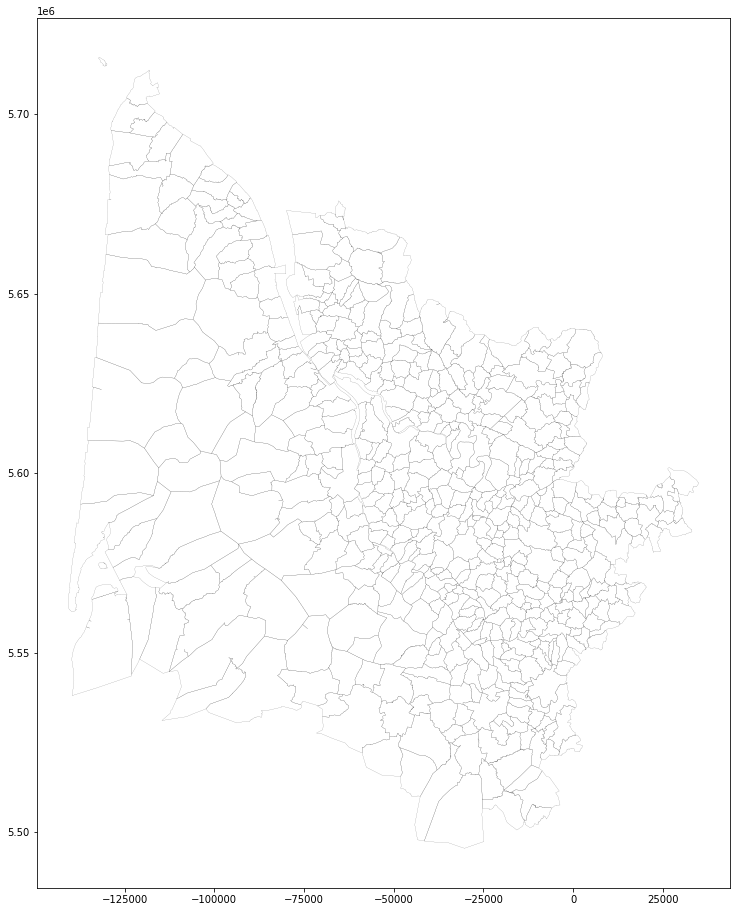

In [ ]:
#Cartographier la création de logements sociaux 

Carte2, ax = plt.subplots(figsize=(18,16))
communes.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.1, color = 'black')
communesPC.to_crs('EPSG:3857').plot(ax=ax, column="NB_LGT_SOC", alpha=1, cmap='Blues',scheme='natural_breaks', categorical=False, legend=True)
ctx.add_basemap(ax,  source=ctx.providers.CartoDB.Positron)
ax.axis("off")
plt.show()



In [ ]:
communesPC["TYP_ANNEXE"] = communesPC["TYP_ANNEXE"].astype(int)
communesPC['TYP_ANNEXE'] = communesPC['TYP_ANNEXE'].apply(lambda x: 'Piscine' if (x == 1) else 'Garage' if (x == 2) else 'Véranda' if (x == 3) else 'Abri de jardin' if (x == 4) else 'Autre annexe' if (x == 5) else 'plusieurs annexes' if (x == 6) else 'aucune annexe' ) 
communesPC['TYP_ANNEXE']

0         aucune annexe
1         aucune annexe
2         aucune annexe
3         aucune annexe
4         aucune annexe
              ...      
30564     aucune annexe
30565     aucune annexe
30566     aucune annexe
30567    Abri de jardin
30568     aucune annexe
Name: TYP_ANNEXE, Length: 30569, dtype: object

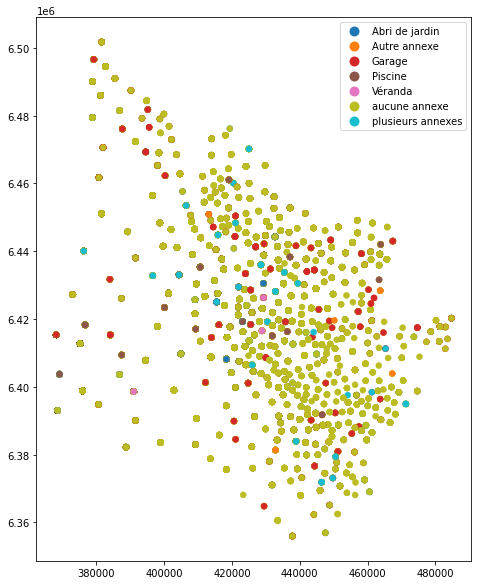

In [ ]:
#Cartographier les IRIS en fonction de l'arrondissement

communesPC.plot(column = "TYP_ANNEXE", linewidth=0.5, figsize=(20,10), legend=True)

### Nombre total de logements créés, interpolation raster

In [ ]:
# Nombre de logements créés par commune, classés du plus grand au plus petit
communesPC["NB_LGT"] = communesPC["NB_LGT"].astype(int)
ARDT = communesPC.dissolve(by='nom', aggfunc = 'sum')
ARDT.sort_values(["NB_LGT"], ascending=False).head()

,geometry,NB_LGT_SOC,NB_LGT
nom,,,
BORDEAUX,POINT (417794.579 6423981.399),3188,15006
VILLENAVE D ORNON,POINT (418556.329 6414586.948),1056,4684
LORMONT,POINT (422226.285 6425856.600),3,3818
MERIGNAC,POINT (409111.339 6421579.333),772,3478
PESSAC,POINT (409314.993 6417047.213),1037,2977


In [ ]:
# Nous avons éliminé Bordeaux pour pouvoir visualiser correctement le reste des communes
ARDT = ARDT[(ARDT["NB_LGT"] < 5000)]
ARDT.sort_values(["NB_LGT"], ascending=False).head()

,geometry,NB_LGT_SOC,NB_LGT
nom,,,
VILLENAVE D ORNON,POINT (418556.329 6414586.948),1056,4684
LORMONT,POINT (422226.285 6425856.600),3,3818
MERIGNAC,POINT (409111.339 6421579.333),772,3478
PESSAC,POINT (409314.993 6417047.213),1037,2977
BEGLES,POINT (419439.687 6417677.193),353,2193


,geometry,NB_LGT_SOC,NB_LGT
nom,,,
ABZAC,POINT (453512.723 6439501.089),0,57
AILLAS,POINT (456181.578 6380763.500),0,21
AMBARES-ET-LAGRAVE,POINT (423951.032 6433357.563),70,688


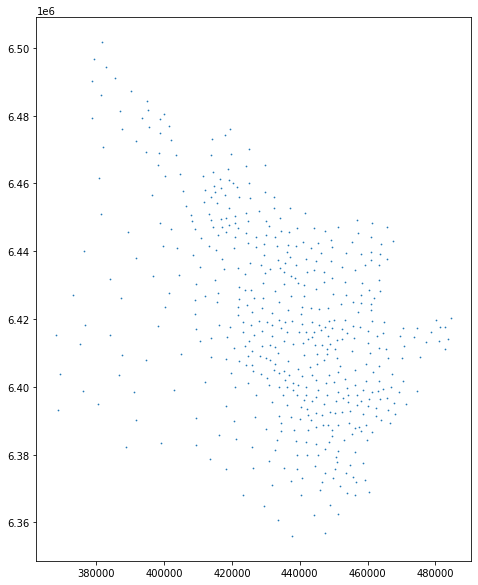

In [ ]:
# Nous transformons l'information en ponctuel, en utilisant les centroïdes
Points = ARDT.copy()
Points.geometry = Points['geometry'].centroid
Points.crs = ARDT.crs
Points.plot(figsize=(300,10), markersize=0.5, legend=True)
Points.head(3)

In [ ]:
# Il est important de connaître le nombre d'entités que l'on va interpoler, pour ajuster le temps de traitement et le poids 
# de notre raster final
len(Points)

510

In [ ]:
# Informations pour créer la zone de délimitation du raster que nous allons créer
ulx = min(communes['geometry'].bounds.minx)   # 361762.1994121989
uly = max(communes['geometry'].bounds.maxy)   # 6508238.65237821
lrx = max(communes['geometry'].bounds.maxx)   # 487865.52020749846
lry = min(communes['geometry'].bounds.miny)   # 6349291.967567053
xsize = 1261        # xcellsize = (xmax - xmin)  --> 126103.3207953  / 100 = 1261 (Taille pixel 100x100) RESOLUTION DU RASTER
ysize = 1589        # ycellsize = (ymax - ymin)  --> 158946.68481116 / 100 = 1589 (Taille pixel 100x100) RESOLUTION DU RASTER

In [ ]:
Points.to_file('Points.shp')                # Couche de points en entrée
communes.to_file('Communes.shp')            # Masque pour définir le contour du raster

In [ ]:
# Creation du raster geospatial pour le nombre total de logements créés
rasterTemp = gdal.Grid('Interpolation.tif', 'Points.shp', format='GTiff', zfield="NB_LGT",     # (Raster en sorti, Points en entrée, format raster sorti, champ interpolation)
                    algorithm="invdist:power=3:radius1=10000:radius2=10000",                   # inverse de la distance pondérée (idw):poids de la variable à interpoler:rayon d'inter
                    outputBounds = [ulx,uly,lrx,lry], 
                    width = xsize, height = ysize)
rasterTemp = None

In [ ]:
# Nous appliquons le masque pour définir le contour (Clip)
gdal.Warp('Interpolation.tif','Interpolation.tif', cutlineDSName='Communes.shp')

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fadde82b630> >

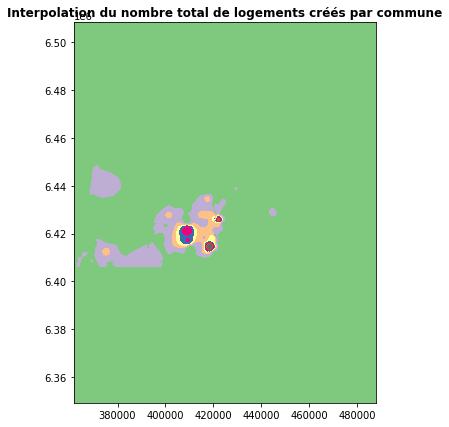

In [ ]:
# Affichage du raster
fig, axes = plt.subplots(figsize=(1.62*7,7))
rasterio.plot.show(src,
                    cmap='Accent',                  
                    ax = axes,
                    title="Interpolation du nombre total de logements créés par commune"
                   )

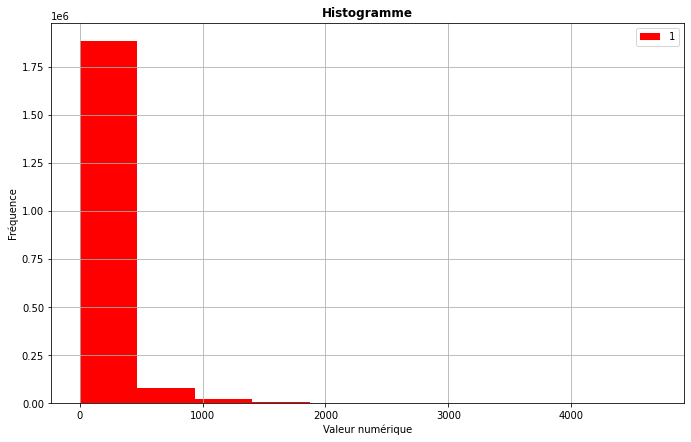

In [ ]:
# Histogramme des valeurs de chacun des pixels qui composent la bande raster
fig, axes = plt.subplots(figsize=(1.62*7,7))
rasterio.plot.show_hist(src,                   
                    ax = axes,
                    title="Histogramme"
                   )
axes.set_xlabel("Valeur numérique")
_ = axes.set_ylabel("Fréquence")

###Nombre de PC par commune  carte-> cercle proportionnel

In [ ]:
#Compter le nombre de PC par commune 
NbPC  = sitadelok[["COMM", "Num_DAU"]].groupby("COMM").count()
NbPC = pd.DataFrame(NbPC)
NbPC = NbPC.rename(columns={0: 'NbPC'})
NbPC.head(5)



,Num_DAU
COMM,
33001,46
33002,14
33003,285
33004,2
33005,592


In [ ]:
NbPC = NbPC.sort_values("id", ascending=True)
NbPC.plot(kind="barh")
NbPC.head()

KeyError: ignored

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:413: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  UserWarning,


IndexError: ignored

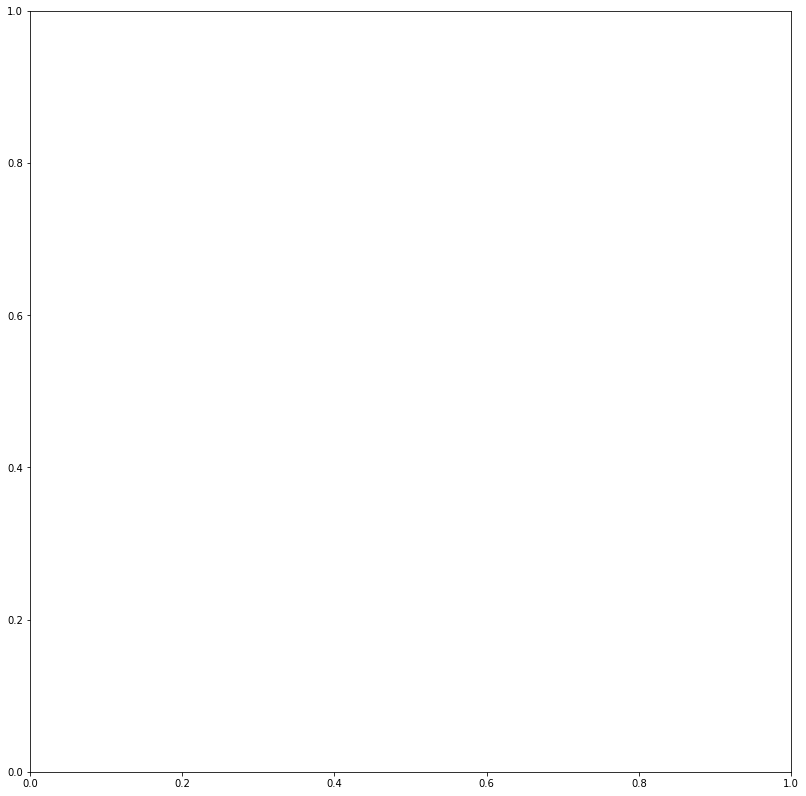

In [ ]:
# Carte cercles proportionnnels
CommunesCentro = communes.copy()
CommunesCentro.geometry = CommunesCentro['geometry'].centroid

NbPC['Num_DAU'] = NbPC['Num_DAU'].astype(float)
Carte4, ax = plt.subplots(figsize=(16,14))
CommunesCentro.boundary.to_crs('EPSG:2154').plot(ax=ax, linewidth=0.2, color = 'black')
CommunesCentro.plot(ax=ax, color="#FF851B", markersize=NbPC['Num_DAU']/50, alpha=0.8, categorical=False, legend=True)
ax.axis("off")

ValueError: ignored

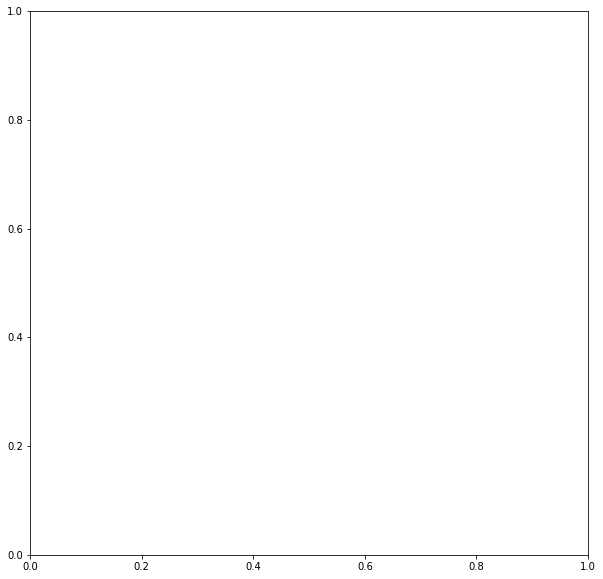

In [ ]:

# Graphiquee du nombre de bâtiments par zonage

Categorie = NbPC[["COMM", "ID_Bati"]].groupby("typezCOMMone").count()
Categorie.plot.pie(figsize =(14,5), y="ID_Bati" )
Categorie.head()0),column="COMM", markersize="Num_DAU",alpha=1, cmap='Spectral_r',scheme='quantiles', categorical=False, legend=True)


### Utilisation de la résidence -> personnelle vente location


### Type d’annexe -> piscine garage véranda abri de jardin -> carte catégorisé

### Nbr de piece dans le logement -> carte

### Nbr de logement sociaux ou aidés -> graphiques

### Résidence principale ou secondaire -> graphique

### Nombre de PC par type (Personnes agés et Étudiants ) -> carte ou graphique

### Taux d'évolution selon la surface créé  -> carte


### Date d’achèvement des travaux

### Si PC autorisé ou pas

### Utilisation de la résidence -> personnelle vente location

### Nouvelle construction ou rénovation